<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/early_stopping_and_patience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes

diabete_dataset = load_diabetes()

In [2]:
print(diabete_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [3]:
data = diabete_dataset['data']
target = diabete_dataset['target']

In [4]:
target = (target - target.mean(axis=0)) / target.std()

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [6]:
print(f'train set shape: {train_data.shape}')
print(f'test set shape: {test_data.shape}')
print(f'train target shape: {train_target.shape}')
print(f'test target shape: {test_target.shape}')

train set shape: (397, 10)
test set shape: (45, 10)
train target shape: (397,)
test target shape: (45,)


# Define unregularised model

In [7]:
import tensorflow as tf

def get_unregularised_model():

  model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(1)])
  return model

## Train the unregularised model with `EarlyStopping()`

In [8]:
unregularised_model = get_unregularised_model()
unregularised_model.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.MeanAbsoluteError())
unreg_history = unregularised_model.fit(train_data, train_target,
                          validation_split=0.15, batch_size=64, 
                          epochs =100, verbose=2,
                          callbacks=[tf.keras.callbacks.EarlyStopping()])

Epoch 1/100
6/6 - 1s - loss: 0.9951 - mean_absolute_error: 0.8489 - val_loss: 0.8153 - val_mean_absolute_error: 0.7952
Epoch 2/100
6/6 - 0s - loss: 0.8809 - mean_absolute_error: 0.7962 - val_loss: 0.6554 - val_mean_absolute_error: 0.7091
Epoch 3/100
6/6 - 0s - loss: 0.6416 - mean_absolute_error: 0.6697 - val_loss: 0.5577 - val_mean_absolute_error: 0.6005
Epoch 4/100
6/6 - 0s - loss: 0.5011 - mean_absolute_error: 0.5660 - val_loss: 0.4596 - val_mean_absolute_error: 0.5064
Epoch 5/100
6/6 - 0s - loss: 0.4768 - mean_absolute_error: 0.5521 - val_loss: 0.4522 - val_mean_absolute_error: 0.5131
Epoch 6/100
6/6 - 0s - loss: 0.4783 - mean_absolute_error: 0.5569 - val_loss: 0.5021 - val_mean_absolute_error: 0.4990


In [9]:
unregularised_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.8019 - mean_absolute_error: 0.7019


[0.8018995523452759, 0.7018653154373169]

# Define regularised model

In [10]:
import tensorflow as tf

def get_regularised_model(wd, rate):

  model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],),
                                                            kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(1)])
  return model

In [11]:
reg_model = get_regularised_model(1e-8, 0.2)
reg_model.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.MeanAbsoluteError())
reg_history = reg_model.fit(train_data, train_target, validation_split=0.15, verbose=2,
              epochs=100, batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping()],)

Epoch 1/100
6/6 - 1s - loss: 1.0093 - mean_absolute_error: 0.8579 - val_loss: 0.8666 - val_mean_absolute_error: 0.8230
Epoch 2/100
6/6 - 0s - loss: 0.9750 - mean_absolute_error: 0.8426 - val_loss: 0.7949 - val_mean_absolute_error: 0.7892
Epoch 3/100
6/6 - 0s - loss: 0.8504 - mean_absolute_error: 0.7888 - val_loss: 0.6435 - val_mean_absolute_error: 0.7025
Epoch 4/100
6/6 - 0s - loss: 0.6249 - mean_absolute_error: 0.6630 - val_loss: 0.6418 - val_mean_absolute_error: 0.5570
Epoch 5/100
6/6 - 0s - loss: 0.6521 - mean_absolute_error: 0.6306 - val_loss: 0.5729 - val_mean_absolute_error: 0.5456
Epoch 6/100
6/6 - 0s - loss: 0.5341 - mean_absolute_error: 0.6018 - val_loss: 0.5391 - val_mean_absolute_error: 0.5877
Epoch 7/100
6/6 - 0s - loss: 0.5293 - mean_absolute_error: 0.6126 - val_loss: 0.5561 - val_mean_absolute_error: 0.6156


In [12]:
reg_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.6485 - mean_absolute_error: 0.6624


[0.6484860777854919, 0.6624079942703247]

# Plot learning curves

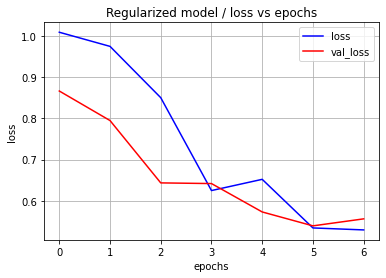

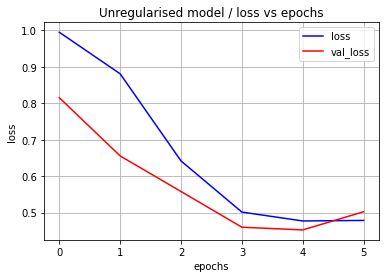

In [13]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string, model_type):

  plt.plot(history.history[string], 'b', label=string)
  plt.plot(history.history['val_'+string], 'r', label='val_'+string)
  plt.title(model_type + ' / ' +string+' vs epochs')
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.grid()
  plt.legend()
  plt.show()

plot_graphs(reg_history, 'loss', 'Regularized model')
plot_graphs(unreg_history, 'loss', 'Unregularised model')

In [14]:
tf.keras.backend.clear_session()

# Train the models with in `EarlyStopping(patience=10)`

In [15]:
unregularised_model = get_unregularised_model()
unregularised_model.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.MeanAbsoluteError())
unreg_history = unregularised_model.fit(train_data, train_target,
                          validation_split=0.15, batch_size=64, 
                          epochs =100, verbose=2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
unregularised_model.evaluate(test_data, test_target, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 0.9914 - mean_absolute_error: 0.8487 - val_loss: 0.8108 - val_mean_absolute_error: 0.7941
Epoch 2/100
6/6 - 0s - loss: 0.8746 - mean_absolute_error: 0.7945 - val_loss: 0.6401 - val_mean_absolute_error: 0.6850
Epoch 3/100
6/6 - 0s - loss: 0.6435 - mean_absolute_error: 0.6642 - val_loss: 0.5662 - val_mean_absolute_error: 0.5920
Epoch 4/100
6/6 - 0s - loss: 0.5524 - mean_absolute_error: 0.6044 - val_loss: 0.5665 - val_mean_absolute_error: 0.5189
Epoch 5/100
6/6 - 0s - loss: 0.5043 - mean_absolute_error: 0.5774 - val_loss: 0.4569 - val_mean_absolute_error: 0.5304
Epoch 6/100
6/6 - 0s - loss: 0.4447 - mean_absolute_error: 0.5375 - val_loss: 0.4542 - val_mean_absolute_error: 0.5067
Epoch 7/100
6/6 - 0s - loss: 0.4548 - mean_absolute_error: 0.5411 - val_loss: 0.4630 - val_mean_absolute_error: 0.4980
Epoch 8/100
6/6 - 0s - loss: 0.4382 - mean_absolute_error: 0.5279 - val_loss: 0.4921 - val_mean_absolute_error: 0.5566
Epoch 9/100
6/6 - 0s - loss: 0.4242 - mean_absol

[0.686880350112915, 0.6441280245780945]

In [16]:
reg_model = get_regularised_model(1e-8, 0.2)
reg_model.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.MeanAbsoluteError())
reg_history = reg_model.fit(train_data, train_target, validation_split=0.15, verbose=2,
              epochs=100, batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],)
reg_model.evaluate(test_data, test_target, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.0096 - mean_absolute_error: 0.8584 - val_loss: 0.8706 - val_mean_absolute_error: 0.8253
Epoch 2/100
6/6 - 0s - loss: 0.9849 - mean_absolute_error: 0.8479 - val_loss: 0.8311 - val_mean_absolute_error: 0.8090
Epoch 3/100
6/6 - 0s - loss: 0.9142 - mean_absolute_error: 0.8225 - val_loss: 0.7523 - val_mean_absolute_error: 0.7707
Epoch 4/100
6/6 - 0s - loss: 0.7728 - mean_absolute_error: 0.7554 - val_loss: 0.6700 - val_mean_absolute_error: 0.7074
Epoch 5/100
6/6 - 0s - loss: 0.6113 - mean_absolute_error: 0.6687 - val_loss: 0.5738 - val_mean_absolute_error: 0.5854
Epoch 6/100
6/6 - 0s - loss: 0.6024 - mean_absolute_error: 0.6291 - val_loss: 0.5747 - val_mean_absolute_error: 0.5708
Epoch 7/100
6/6 - 0s - loss: 0.5613 - mean_absolute_error: 0.6187 - val_loss: 0.5263 - val_mean_absolute_error: 0.5795
Epoch 8/100
6/6 - 0s - loss: 0.5478 - mean_absolute_error: 0.6067 - val_loss: 0.5129 - val_mean_absolute_error: 0.5843
Epoch 9/100
6/6 - 0s - loss: 0.5108 - mean_absol

[0.6369557976722717, 0.6210547089576721]

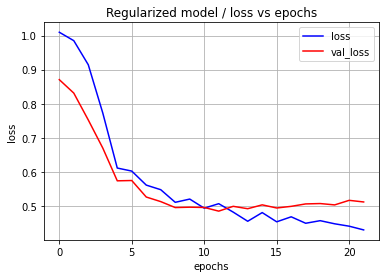

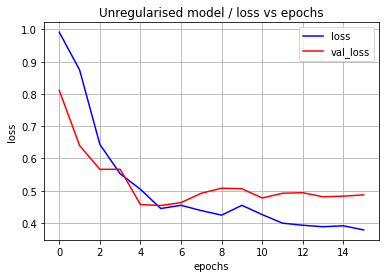

In [17]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string, model_type):

  plt.plot(history.history[string], 'b', label=string)
  plt.plot(history.history['val_'+string], 'r', label='val_'+string)
  plt.title(model_type + ' / ' +string+' vs epochs')
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.grid()
  plt.legend()
  plt.show()

plot_graphs(reg_history, 'loss', 'Regularized model')
plot_graphs(unreg_history, 'loss', 'Unregularised model')

In [18]:
tf.keras.backend.clear_session()

# Train the models with in `EarlyStopping(patience=2)`

In [19]:
unregularised_model = get_unregularised_model()
unregularised_model.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.MeanAbsoluteError())
unreg_history = unregularised_model.fit(train_data, train_target,
                          validation_split=0.15, batch_size=64, 
                          epochs =100, verbose=2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
unregularised_model.evaluate(test_data, test_target, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 0.9990 - mean_absolute_error: 0.8527 - val_loss: 0.8407 - val_mean_absolute_error: 0.8121
Epoch 2/100
6/6 - 0s - loss: 0.9198 - mean_absolute_error: 0.8183 - val_loss: 0.7281 - val_mean_absolute_error: 0.7553
Epoch 3/100
6/6 - 0s - loss: 0.7114 - mean_absolute_error: 0.7183 - val_loss: 0.5596 - val_mean_absolute_error: 0.6249
Epoch 4/100
6/6 - 0s - loss: 0.5555 - mean_absolute_error: 0.6016 - val_loss: 0.5664 - val_mean_absolute_error: 0.5255
Epoch 5/100
6/6 - 0s - loss: 0.5185 - mean_absolute_error: 0.5760 - val_loss: 0.5014 - val_mean_absolute_error: 0.5698
Epoch 6/100
6/6 - 0s - loss: 0.4920 - mean_absolute_error: 0.5719 - val_loss: 0.4918 - val_mean_absolute_error: 0.5696
Epoch 7/100
6/6 - 0s - loss: 0.4626 - mean_absolute_error: 0.5634 - val_loss: 0.4843 - val_mean_absolute_error: 0.5459
Epoch 8/100
6/6 - 0s - loss: 0.4399 - mean_absolute_error: 0.5374 - val_loss: 0.4987 - val_mean_absolute_error: 0.5243
Epoch 9/100
6/6 - 0s - loss: 0.4297 - mean_absol

[0.6732474565505981, 0.644474446773529]

In [20]:
reg_model = get_regularised_model(1e-8, 0.2)
reg_model.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.MeanAbsoluteError())
reg_history = reg_model.fit(train_data, train_target, validation_split=0.15, verbose=2,
              epochs=100, batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)],)
reg_model.evaluate(test_data, test_target, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.0055 - mean_absolute_error: 0.8561 - val_loss: 0.8597 - val_mean_absolute_error: 0.8202
Epoch 2/100
6/6 - 0s - loss: 0.9682 - mean_absolute_error: 0.8411 - val_loss: 0.7947 - val_mean_absolute_error: 0.7911
Epoch 3/100
6/6 - 0s - loss: 0.8483 - mean_absolute_error: 0.7935 - val_loss: 0.6712 - val_mean_absolute_error: 0.7148
Epoch 4/100
6/6 - 0s - loss: 0.6656 - mean_absolute_error: 0.6955 - val_loss: 0.5679 - val_mean_absolute_error: 0.5840
Epoch 5/100
6/6 - 0s - loss: 0.5984 - mean_absolute_error: 0.6340 - val_loss: 0.6733 - val_mean_absolute_error: 0.6494
Epoch 6/100
6/6 - 0s - loss: 0.6161 - mean_absolute_error: 0.6356 - val_loss: 0.5149 - val_mean_absolute_error: 0.5351
Epoch 7/100
6/6 - 0s - loss: 0.5622 - mean_absolute_error: 0.6095 - val_loss: 0.5064 - val_mean_absolute_error: 0.5498
Epoch 8/100
6/6 - 0s - loss: 0.5352 - mean_absolute_error: 0.6143 - val_loss: 0.5409 - val_mean_absolute_error: 0.5927
Epoch 9/100
6/6 - 0s - loss: 0.5327 - mean_absol

[0.730317234992981, 0.6946715712547302]

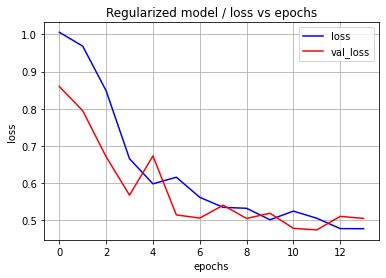

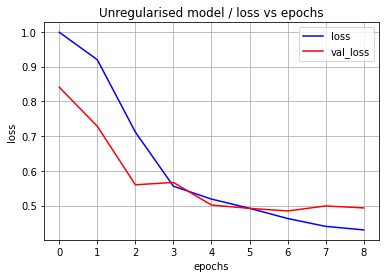

In [21]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string, model_type):

  plt.plot(history.history[string], 'b', label=string)
  plt.plot(history.history['val_'+string], 'r', label='val_'+string)
  plt.title(model_type + ' / ' +string+' vs epochs')
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.grid()
  plt.legend()
  plt.show()

plot_graphs(reg_history, 'loss', 'Regularized model')
plot_graphs(unreg_history, 'loss', 'Unregularised model')

In [22]:
tf.keras.backend.clear_session()